## Model testing on VGG16 Architecture.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from keras.models import load_model
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import keras.utils as image
from keras.utils import load_img
from keras.models import load_model
from keras.applications.resnet_v2 import ResNet152V2, preprocess_input

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/models/vgg16model.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Dataset/AppleScab2.JPG',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x.shape
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
new_model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[2.5003166e-14, 5.1953368e-33, 1.9745787e-09, 1.1287184e-08,
        8.4244835e-23, 9.8427182e-01, 2.9008488e-22, 4.0108056e-13,
        1.7155532e-13, 5.3464251e-12, 7.3801405e-09, 2.5930237e-22,
        3.3053550e-19, 3.4673341e-30, 2.9043795e-23, 1.4605658e-02,
        7.7218260e-04, 1.3520677e-14, 9.0948575e-26, 1.2194346e-16,
        6.3451630e-27, 1.2712230e-15, 1.9214603e-28, 6.2480486e-21,
        9.2389933e-12, 6.1859087e-15, 3.6240871e-22, 3.8067893e-28,
        6.2679063e-11, 6.4344340e-07, 2.4362525e-05, 4.1967059e-08,
        3.2015406e-15, 1.3397098e-18, 2.8446560e-21, 3.2487520e-04,
        1.5657082e-15, 4.6384662e-07]], dtype=float32)

In [ ]:
a=np.argmax(new_model.predict(img_data), axis=1)
a==1

1/1 [==============================] - 2s 2s/step


array([False])

In [ ]:
def load_image(filename):
    img = cv2.imread(filename)
    img = cv2.resize(img, (224, 224) )
    img = img /255
    return img

def model_predict(img_path, model):
    print(img_path)
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x=x/255
    x = np.expand_dims(x, axis=0)
    preds = model.predict(x)
    preds=np.argmax(preds, axis=1)
    classes=['apple scab','apple black rot','cedar apple rust','apple healthy','blueberry healthy','cherry powdery mildew','cherry healthy','corn cercospora leaf gray leaf spot','corn common rust','corn northern leaf blight','corn healthy','grape black rot','grape black measles','grape leaf blight','grape healthy','orange haunglongbing',
      'peach bacterial spot','peach healthy','pepper bell Bacterial spot','pepper bell healthy','potato early blight','potato late blight','potato healthy','raspberry healthy','soybean healthy','squash powdery mildew','strawberry leaf scotch','strawberry healthy','tomato bacterial spot','tomato early blight','tomato late blight','tomato leaf mold','tomato septoria leaf spot','tomato spider mites two spotted spider mite',
      'tomato target spot','Tomato yellow leaf curl virus','tomato mosaic virus','tomato healthy']
    print('Disease : ',classes[int(preds)].upper())

Enter the testing image path: /content/drive/MyDrive/Dataset/Frogeye-spots-Botryosphaeria-obtusa-on-apple-leaf-FB.jpg
/content/drive/MyDrive/Dataset/Frogeye-spots-Botryosphaeria-obtusa-on-apple-leaf-FB.jpg
1/1 [==============================] - 1s 699ms/step
Disease :  APPLE BLACK ROT


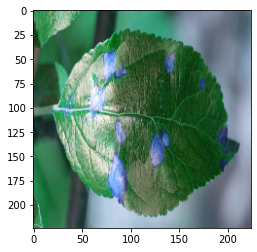

In [ ]:
img_path=input('Enter the testing image path: ')
preds = model_predict(img_path, new_model)
img = load_image(str(img_path))
preds
plt.imshow(img)
plt.show()